In [1]:
clear all;

global ipynb = 'binsum';

source('clearest-nn.m');
source('utils-logging.m');
source('utils-training.m');

% log2file(tmp('log'));

##########################################

% bits = 7;
bits = 2;
printvar('bits');

function y = dectobin(x, n)
    y = dec2bin(x, n);
    y = y(:);
    y = str2num(y);
end

function x = bintodec(y)
    x = num2str(y);
    x = reshape(x, 1, []);
    x = bin2dec(x);
end

function [x, y] = binsum_sample(x1, x2, n)
    x = [dectobin(x1, n), dectobin(x2, n)]; 
    y = dectobin(x1 + x2, n+1);
end

function [X, Y] = binsum_samples(n)
    k = 2^n;
    m = k*k;
    X = zeros(n,  2,m);
    Y = zeros(n+1,1,m);
    i = 1;
    for x1 = 0:k-1 
        for x2 = 0:k-1
            [x,y] = binsum_sample(x1, x2, n);
            X(:,:,i) = x;
            Y(:,:,i) = y;
                  i += 1;
        end
    end
end

[X, Y] = binsum_samples(bits);
[X, Y] = shuffle(X, Y);
printsize('X');
printsize('Y');

function BBB = BATCHES(X, Y)
    BBB = {};
    m   = count(X);
    for i = 1:m
        B.X    = X(:, :, i);
        B.Y    = Y(:, :, i);
        BBB{i} = B;
    end
end

BBB = BATCHES(X, Y);
printsize('BBB');
printsize('BBB{1}.X');
printsize('BBB{1}.Y');
printvar('BBB{1}.X');
printvar('BBB{1}.Y');

function acc = TEST(CTX, BBB, show=0)
    bits = rows(BBB{1}.X);
    m    = count(BBB);
    acc  = 0;
    for i = 1:m
        B    = BBB{i};
        X    = B.X;
        y    = B.Y;
        z    = predict(CTX, X);
        z    = z > 0.5;
        y    = bintodec(y);
        z    = bintodec(z);
        eq   = y == z;
        acc += eq/m;
        if show
            x1 = bintodec(X(:,1));
            x2 = bintodec(X(:,2));
            if eq
                eq = '==';
            else       
                eq = '!='; 
            end
            fmt = sprintf("%%-%dd + %%-%dd = %%-%dd %%s %%-%dd\n", bits, bits, bits+1, bits+1);
            printlog(fmt, x1, x2, y, eq, z);
        end
    end
end

function CTX = LEARN(CTX, times=11, varargin)
    CTX = TUNE(CTX, varargin{:});
    BBB = evalin('caller', 'BBB');
    [CTX, ok] = TRAIN(CTX, BBB, times); 
    global ipynb;
    notifed = pushnotify(sprintf('%s: smth_learnt=%s', ipynb, bool2yesno(ok)))
    if ok
        save('-binary', tmp('ctx'), 'CTX');
    end
end

function printgated(CTX, ggg)
    gru = import(CTX, ggg).layers{1};
    ggu = gru.Gu.layers{1};
    ggr = gru.Gr.layers{1};
    ggc = gru.Gc.layers{1};
    gWu = ggu.W
    gbu = ggu.b
    gWr = ggr.W
    gbr = ggr.b
    gWc = ggc.W
    gbc = ggc.b
end


ans = THE CLEAREST NEURAL NETWORK FRAMEWORK BY UNDWAD
OpenJDK 64-Bit Server VM warning: Archived non-system classes are disabled because the java.system.class.loader property is specified (value = "org.octave.OctClassLoader"). To use archived non-system classes, this property must be not be set
bits = 2
X = matrix [2 2 16]
Y = matrix [3 1 16]
BBB = cell [1 16]
BBB{1}.X = matrix [2 2]
BBB{1}.Y = matrix [3 1]
BBB{1}.X = [1 0;1 1]
BBB{1}.Y = [1;0;0]


In [2]:
source('clearest-nn.m');

rand('state', 1);

CTX = model(bits, {'recurrent', 8*bits}, {'dense', bits+1}, 'sigmoid');
% CTX = model(bits, {'gated_recurrent', 2*bits}, {'dense', bits+1}, 'sigmoid');

CTX = optimization( CTX
%                   , {'L2_regularization', 0.001}
%                     , {'descent', 0.1}
%                   , {'momentum', 0.1}
                   , {'nesterov', 0.0001}
%                  , {'adam', 0.1}
%                   , {'rprop', 0.1}
                  , {'gradient_clipping',0.9}
                  , 'stats'
                  );

CTX = objective(CTX, 'multitaskloss');

% load('-binary', tmp('ctx'), 'CTX');

% printmodel('CTX');
printvar('CTX.num_p')


ans = THE CLEAREST NEURAL NETWORK FRAMEWORK BY UNDWAD
CTX.num_p = 355


In [18]:
overall_accuracy = TEST(CTX, BBB, show=1);
printvar('overall_accuracy');

3  + 1  = 4   == 4  
1  + 3  = 4   == 4  
0  + 1  = 1   == 1  
0  + 2  = 2   == 2  
3  + 3  = 6   == 6  
2  + 1  = 3   == 3  
2  + 2  = 4   == 4  
1  + 0  = 1   == 1  
0  + 0  = 0   == 0  
2  + 0  = 2   == 2  
1  + 1  = 2   == 2  
0  + 3  = 3   == 3  
1  + 2  = 3   == 3  
3  + 2  = 5   == 5  
2  + 3  = 5   == 5  
3  + 0  = 3   == 3  
overall_accuracy = 1


nesterov.rate = 0.001000

starts_at = 10-Jun-2020 07:16:04
GRAD_DIFF = 0.000000
params_checked = 355

1: 2.149226            accuracy: 0.125000       gradient-norm: 0.003725  update-ratio: 0.000763   
10: 2.003229 ↓         accuracy: 0.125000       gradient-norm: 0.004239  update-ratio: 0.000869   

GRAD_DIFF = 0.000000
params_checked = 355
overall: objective ↓, accuracy  
ends_at = 10-Jun-2020 07:16:12

notifed = 1


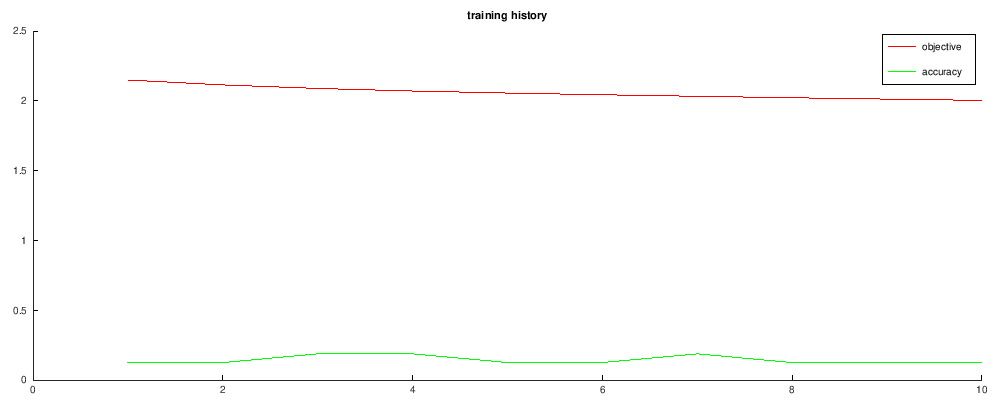

In [4]:
CTX = LEARN(CTX, times=10, {'nesterov', 'rate', 0.001});

nesterov.rate = 0.001000

starts_at = 10-Jun-2020 07:16:53
GRAD_DIFF = 0.000000
params_checked = 355

1: 1.445413            accuracy: 0.500000       gradient-norm: 0.003902  update-ratio: 0.000629   
100: 0.866845 ↓        accuracy: 0.875000       gradient-norm: 0.003139  update-ratio: 0.000380   

GRAD_DIFF = 0.000000
params_checked = 355
overall: objective ↓, accuracy ↑
ends_at = 10-Jun-2020 07:17:17

notifed = 1


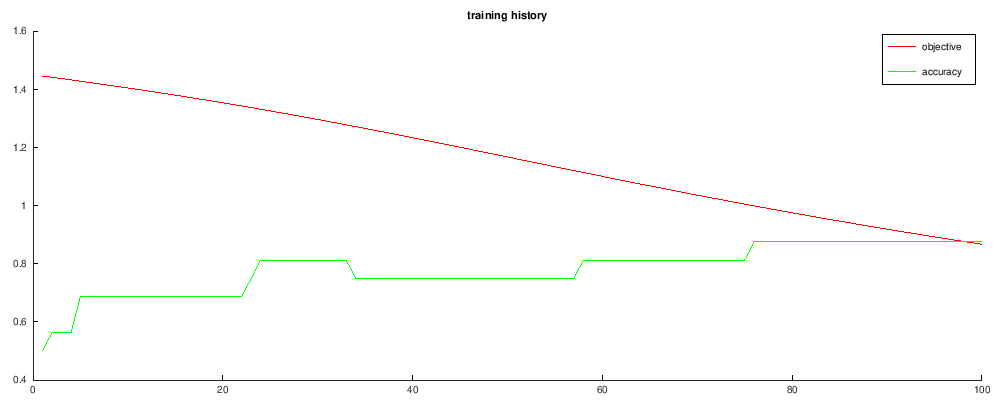

In [6]:
CTX = LEARN(CTX, times=100, {'nesterov', 'rate', 0.001});

nesterov.rate = 0.000100

starts_at = 10-Jun-2020 07:25:09
GRAD_DIFF = 0.000000
params_checked = 355

1: 0.489424            accuracy: 0.937500       gradient-norm: 0.000282  update-ratio: 0.000028   
7: 0.487337 ↓          accuracy: 1.000000       gradient-norm: 0.000282  update-ratio: 0.000028   

GRAD_DIFF = 0.000000
params_checked = 355
overall: objective ↓, accuracy ↑
ends_at = 10-Jun-2020 07:25:18

notifed = 1


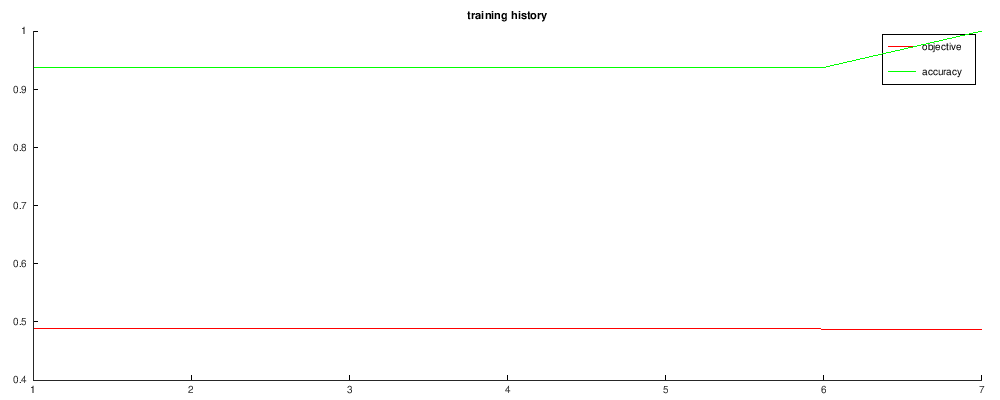

In [16]:
CTX = LEARN(CTX, times=100, {'nesterov', 'rate', 0.0001});

In [17]:
[GRAD_DIFF, ggg, params_checked] = check_gradient(CTX, pick(BBB));
GRAD_DIFF
params_checked
printgated(CTX, ggg)

GRAD_DIFF =    5.8283e-09
params_checked =  355
error: structure has no member 'Gu'
error: called from
    printgated at line 3 column 9


In [ ]:
overall_accuracy = TEST(CTX, BBB, show=1);
printvar('overall_accuracy');

In [ ]:
source('clearest-nn.m');

DDD = zeros(CTX.num_p, 1);
for i = 1:count(BBB)
    batch_num = i
    B = BBB{i}
    %printall(CTX, B.X, B.Y);
    [CTX, ggg, E, acc] = pretrain(CTX, B.X, B.Y);
    ggg;
    E;
    acc;
    printgated(CTX, ggg)
    [GRAD_DIFF, ddd, params_checked] = check_gradient(CTX, B);
    DDD += abs(ddd);
    printf('\n')
end

printgated(CTX, DDD);
